In [1]:
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '6'

In [3]:
df = pd.read_csv("/home/ianli/homl-self/credit_fraud/data/creditcard.csv")

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
df.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

<div class="alert alert-block alert-info">
exploring data

In [44]:
import seaborn as sns

# Class distribution
print(df['Class'].value_counts(normalize=True))


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


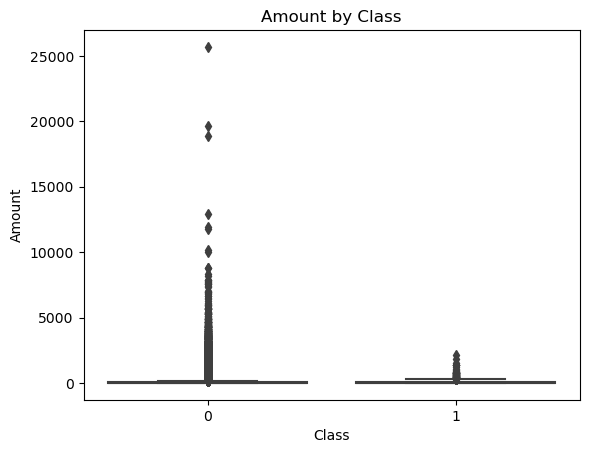

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


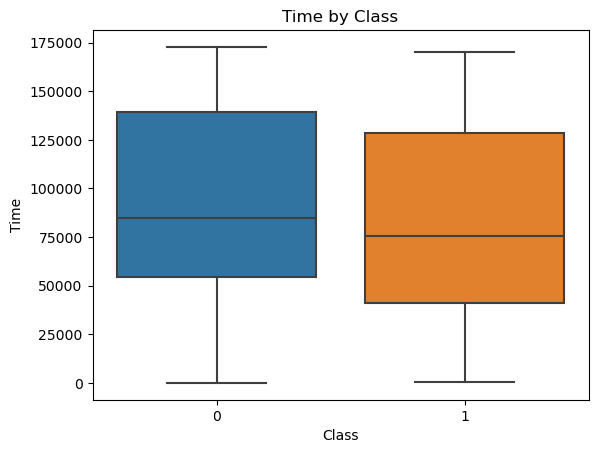

In [45]:
# Boxplots for 'Amount' and 'Time' by Class
for col in ['Amount', 'Time']:
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.show()

time does not look that interesting based on this box plot

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

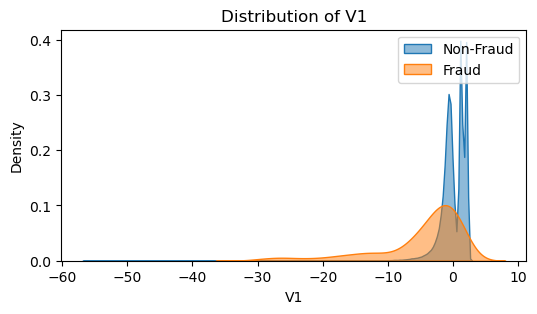

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

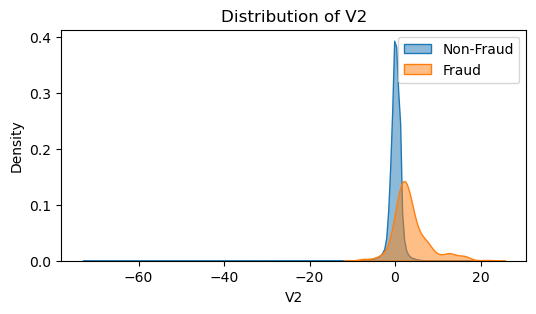

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

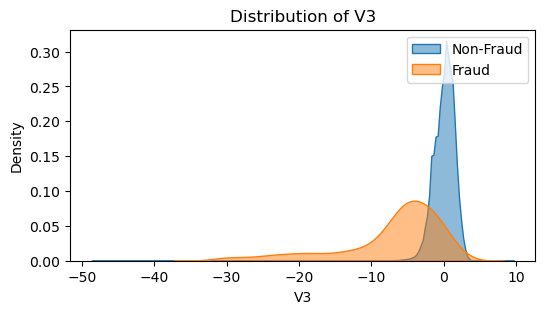

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

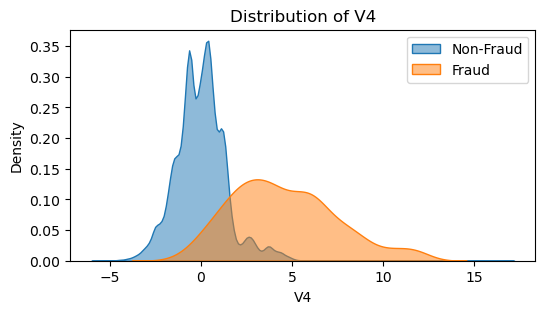

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

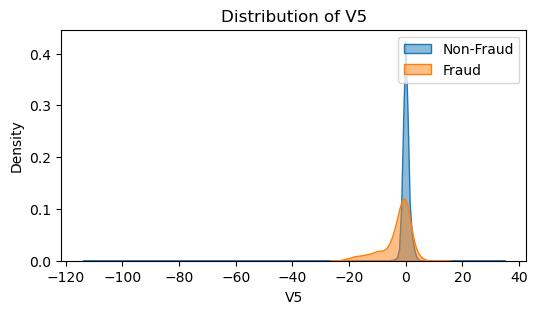

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

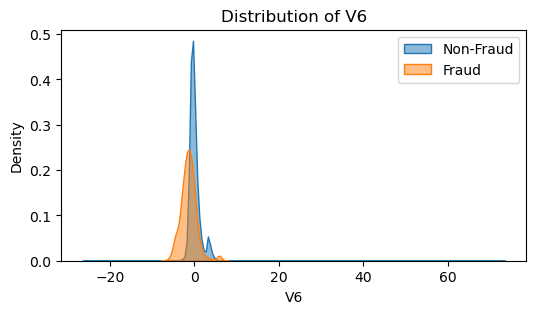

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

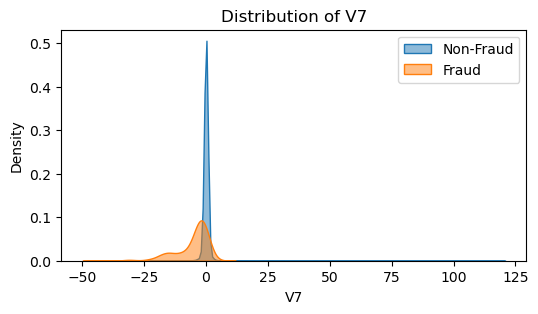

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

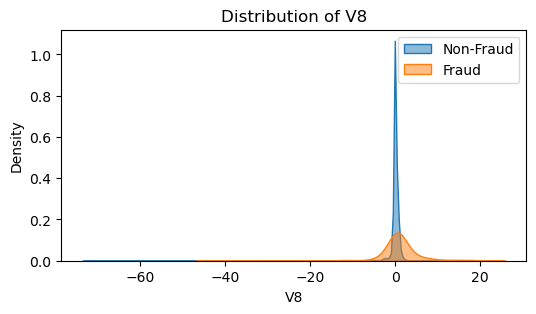

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

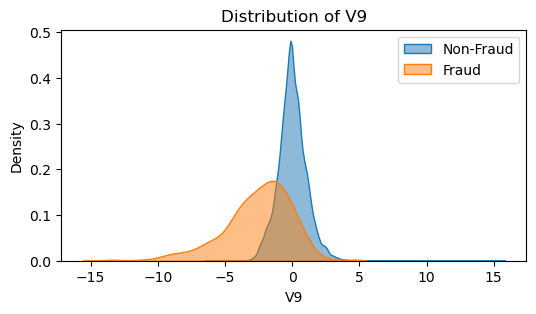

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

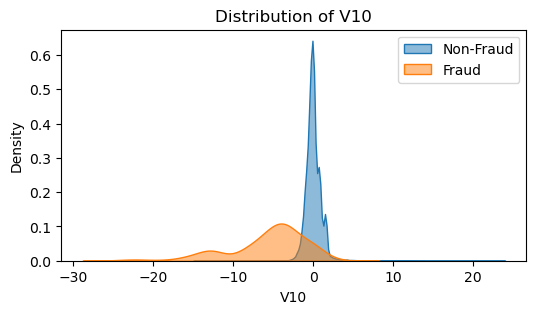

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

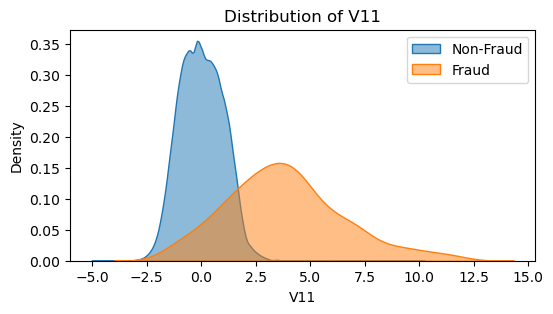

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

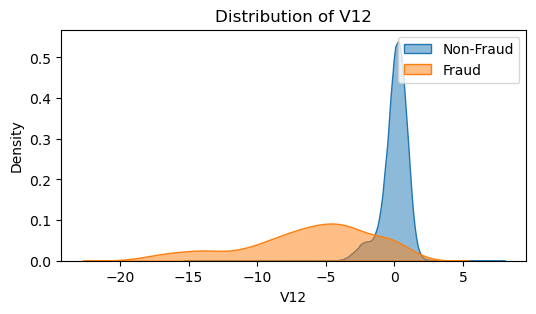

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

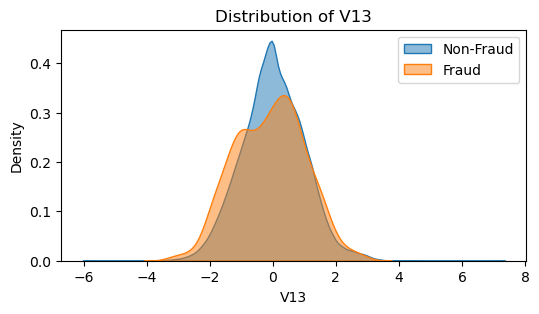

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

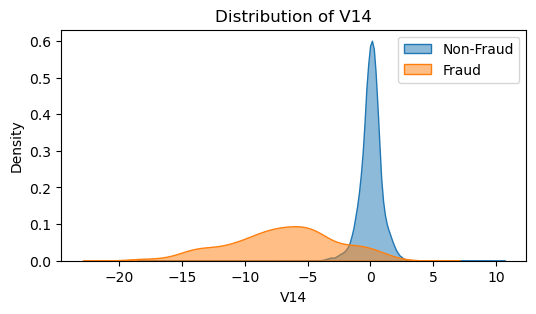

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

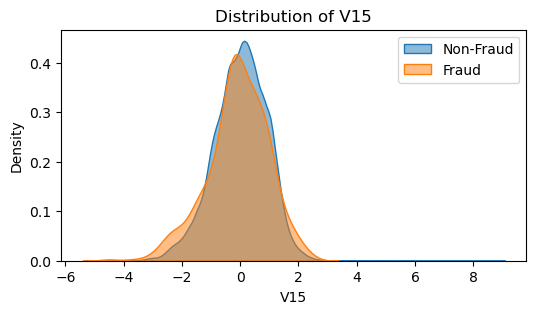

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

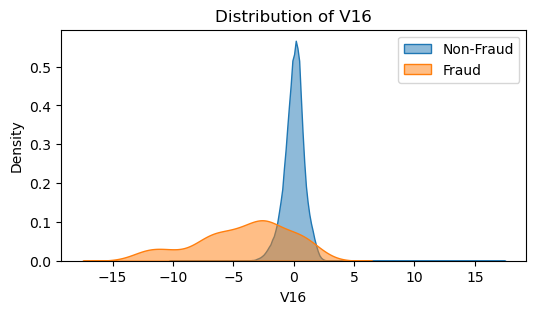

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

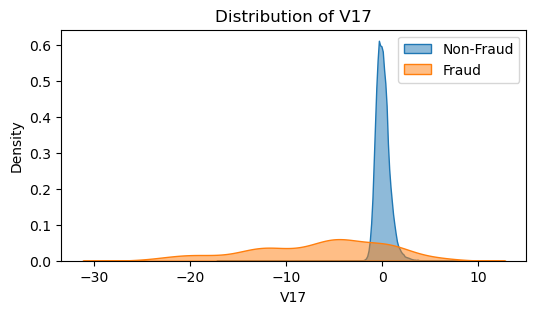

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

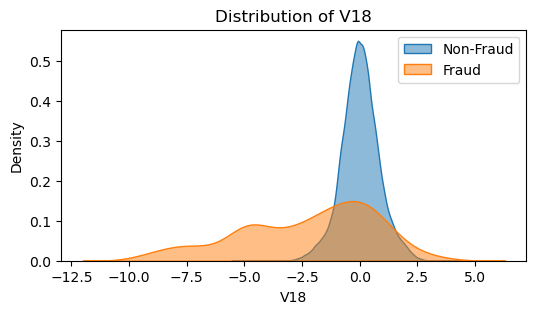

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

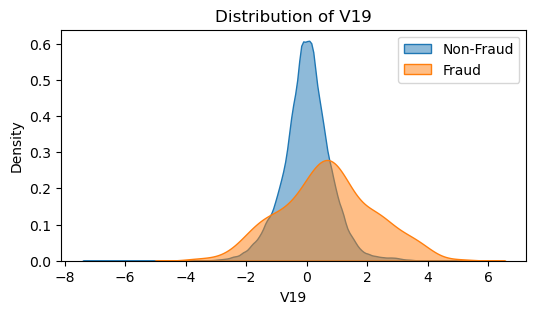

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

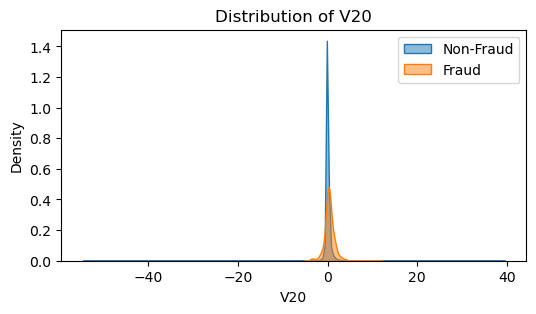

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

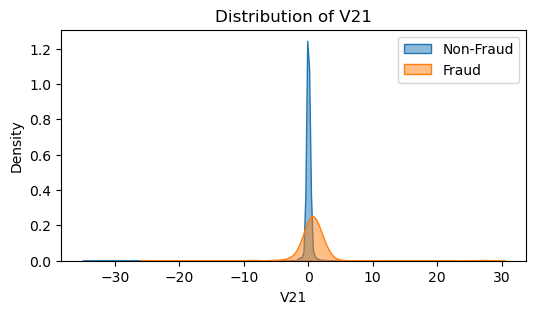

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

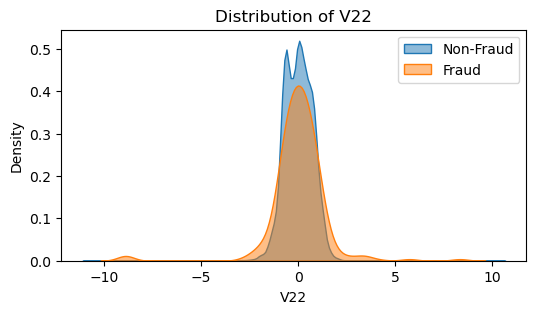

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

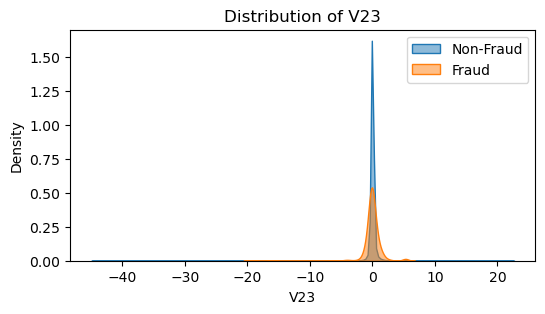

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

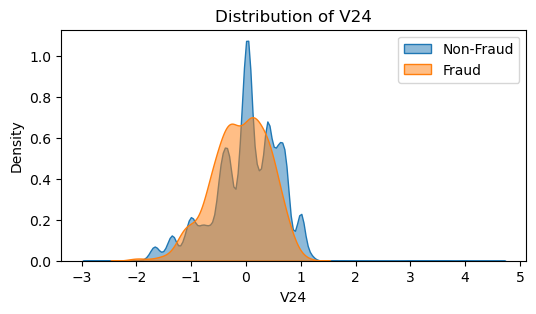

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

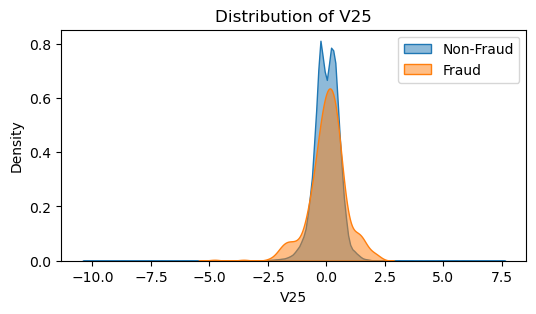

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

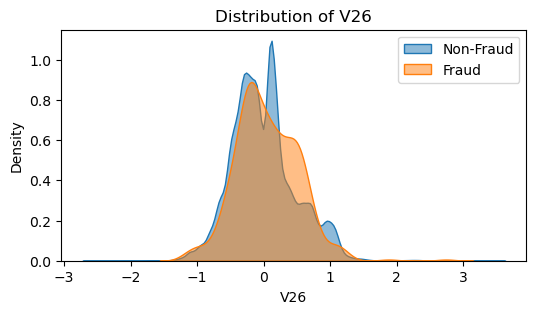

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

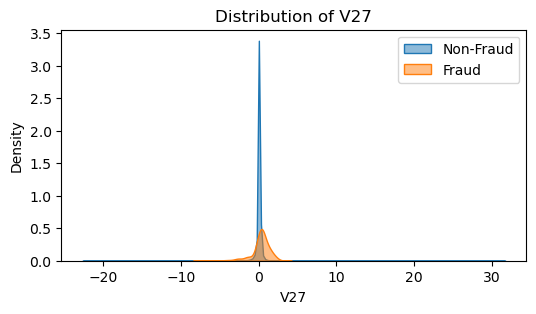

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

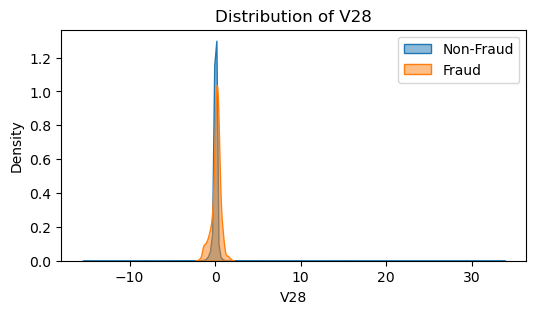

In [6]:
fraud = df[df['Class'] == 1]
nonfraud = df[df['Class'] == 0]

# Density plots of V-features
for col in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(nonfraud[col], label='Non-Fraud', fill=True, alpha=0.5)
    sns.kdeplot(fraud[col], label='Fraud', fill=True, alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

v15 22 25 28 looks visually similar in kde


Signed correlation for top correlated features:
Class    1.000000
V17     -0.326481
V14     -0.302544
V12     -0.260593
V10     -0.216883
V16     -0.196539
V3      -0.192961
V7      -0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

Top features most correlated with fraud (by magnitude):
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


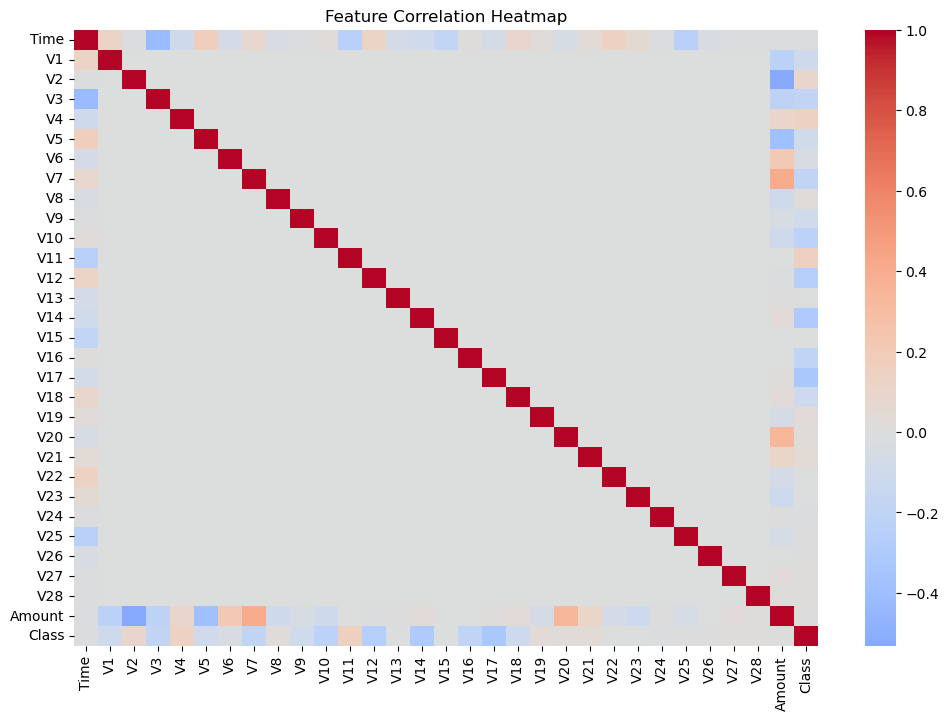

In [ ]:
# absolute correlation with Class
corr_abs = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)

# top 10 feature names
top_features = corr_abs.head(10).index

#actual signed correlations for interpretation
print("\nSigned correlation for top correlated features:")
print(df.corr(numeric_only=True)['Class'][top_features])

#top absolute correlations
print("\nTop features most correlated with fraud (by magnitude):")
print(corr_abs.head(10))


# Full heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

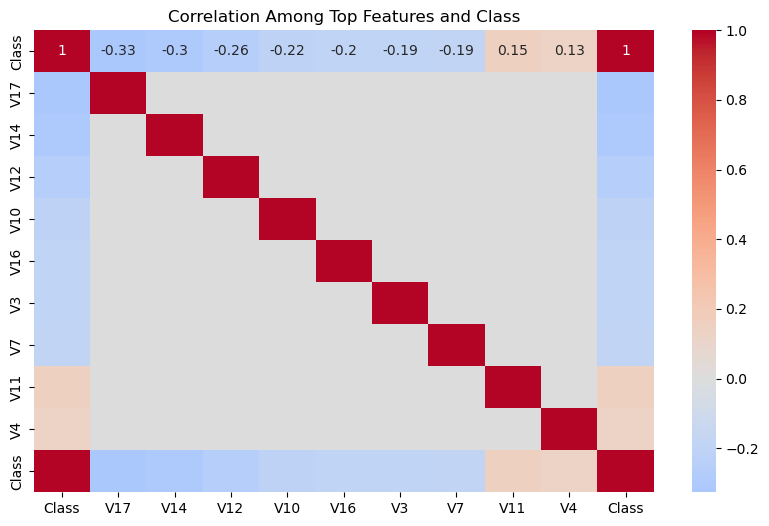

In [ ]:
top_corr_features = list(top_features) + ['Class']
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Among Top Features and Class")
plt.show()

notice that 15 has low correlation in abs terms

<div class="alert alert-block alert-info">
model testing

In [5]:
X = df.drop(columns=['Class'])
y = df['Class']

#Split into (train+valid) and test
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X, y))

X_train_valid = X.iloc[train_valid_idx]
y_train_valid = y.iloc[train_valid_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print("Train+Valid shape:", X_train_valid.shape)
print("Test shape:", X_test.shape)

Train+Valid shape: (227845, 30)
Test shape: (56962, 30)


In [8]:
# Split train+valid into train and validation
# 20% of 80% = 16% total
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid.iloc[train_idx]
y_train = y_train_valid.iloc[train_idx]
X_valid = X_train_valid.iloc[valid_idx]
y_valid = y_train_valid.iloc[valid_idx]

print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (182276, 30)
Valid shape: (45569, 30)


<div class="alert alert-block alert-info">
random forest variants

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns= X_valid.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_det(model, X_test, y_test, X_valid, y_valid):
    # Predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_proba_valid = model.predict_proba(X_valid)[:, 1]

    y_pred_valid = (y_proba_valid >= 0.5).astype(int)

    # Basic Metrics test
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Basic Metrics valid
    f1_valid = f1_score(y_valid, y_pred_valid)

    # AUCs
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_test = auc(fpr_test, tpr_test)

    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)

    auc_diff = auc_valid - auc_test

    # Display metrics
    metrics = {
        'Accuracy (Test)': round(accuracy, 6),
        'Precision (Test)': round(precision, 6),
        'Recall (Test)': round(recall, 6),
        'F1 Score (Test)': round(f1_test, 6),
        'F1 Score (Valid)': round(f1_valid, 6),
        'AUC (Valid)': round(auc_valid, 6),
        'AUC (Test)': round(auc_test, 6),
        'AUC Gap (Valid - Test)': round(auc_diff, 6)
    }

    print("Evaluation at Default Threshold (0.5):")
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})", color='darkorange', lw=2)
    plt.plot(fpr_valid, tpr_valid, label=f"Valid ROC (AUC = {auc_valid:.3f})", color='blue', linestyle='--')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: Validation vs Test')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    return metrics

def plot_normalized_conf_matrix(y_true, y_pred):
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        normalize='true',  # row-wise (i.e., per actual class)
        cmap='Blues',
        values_format=".2f"
    )
    plt.title("Normalized Confusion Matrix")
    plt.grid(False)
    plt.show()

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap_score = average_precision_score(y_true, y_scores)

    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='purple', lw=2, label=f"AP = {ap_score:.3f}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Average precision Curve')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()
    
    print(f"Average Precision (AP): {ap_score:.6f}")

def plot_precision_recall_vs_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
    plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
    plt.xlabel('Decision Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs Threshold')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

def find_best_f1_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # avoid division by zero
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]
    return best_threshold, best_f1



def plot_f1_vs_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8) 

    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, f1_scores[:-1], color='green', label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

def evaluate_model_proba_analysis(model, X_valid, y_valid, X_test, y_test):
    # Evaluate fixed threshold (0.5) metrics and ROC curve with validation comparison
    metrics = evaluate_model_det(model, X_test, y_test, X_valid, y_valid)

    # Predict probabilities on test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Predict class labels at default 0.5 threshold for confusion matrix
    y_pred = (y_proba >= 0.5).astype(int)

    # Plot probability-based curves
    plot_precision_recall_curve(y_test, y_proba)
    plot_precision_recall_vs_threshold(y_test, y_proba)
    plot_f1_vs_threshold(y_test, y_proba)

    # Plot normalized confusion matrix
    plot_normalized_conf_matrix(y_test, y_pred)

    return metrics

# --- Final evaluation with optimized threshold ---
def evaluate_with_best_threshold(model, X_test, y_test, X_valid, y_valid):
    # Predict probabilities
    y_proba_valid = model.predict_proba(X_valid)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Find best threshold on validation set
    best_thresh, best_f1 = find_best_f1_threshold(y_valid, y_proba_valid)

    print(f"\nBest threshold by max F1 (on validation): {best_thresh:.4f}")
    print(f"Best F1 Score (validation): {best_f1:.4f}\n")

    # Apply threshold
    y_pred_valid = (y_proba_valid >= best_thresh).astype(int)
    y_pred_test = (y_proba_test >= best_thresh).astype(int)

    # Evaluate on validation set
    acc_valid = accuracy_score(y_valid, y_pred_valid)
    prec_valid = precision_score(y_valid, y_pred_valid)
    rec_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)

    # Evaluate on test set
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Calculate AUCs and AUC gap at best threshold
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_test = auc(fpr_test, tpr_test)

    auc_gap = auc_valid - auc_test

    # Also evaluate metrics at default threshold (0.5)
    default_metrics = evaluate_model_det(model, X_test, y_test, X_valid, y_valid)

    print("\nEvaluation at Best Threshold:")
    print("-------- Validation Set --------")
    print(f"Accuracy:  {acc_valid:.6f}")
    print(f"Precision: {prec_valid:.6f}")
    print(f"Recall:    {rec_valid:.6f}")
    print(f"F1 Score:  {f1_valid:.6f}")
    print(f"AUC:       {auc_valid:.6f}")

    print("---------- Test Set ----------")
    print(f"Accuracy:  {acc_test:.6f}")
    print(f"Precision: {prec_test:.6f}")
    print(f"Recall:    {rec_test:.6f}")
    print(f"F1 Score:  {f1_test:.6f}")
    print(f"AUC:       {auc_test:.6f}")

    print(f"\nAUC Gap (Valid - Test): {auc_gap:.6f}")

    # Plot performance on test set
    plot_normalized_conf_matrix(y_test, y_pred_test)
    plot_precision_recall_curve(y_test, y_proba_test)
    plot_precision_recall_vs_threshold(y_test, y_proba_test)
    plot_f1_vs_threshold(y_test, y_proba_test)

    return {
        "best_threshold": best_thresh,
        "best_f1": round(best_f1, 6),
        "auc_gap": round(auc_gap, 6),
        "default_metrics": default_metrics,
        "threshold_eval": {
            "Validation": {
                "Accuracy": round(acc_valid, 6),
                "Precision": round(prec_valid, 6),
                "Recall": round(rec_valid, 6),
                "F1 Score": round(f1_valid, 6),
                "AUC": round(auc_valid, 6),
            },
            "Test": {
                "Accuracy": round(acc_test, 6),
                "Precision": round(prec_test, 6),
                "Recall": round(rec_test, 6),
                "F1 Score": round(f1_test, 6),
                "AUC": round(auc_test, 6),
            },
            "AUC Gap (Valid - Test)": round(auc_gap, 6),
        }
    }

In [14]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)  
X_test_pca = pca.transform(X_test_scaled)
pca.n_components_

29

=== Random Forest WITHOUT PCA ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999403
Precision (Test): 0.847826
Recall (Test): 0.795918
F1 Score (Test): 0.821053
F1 Score (Valid): 0.825175
AUC (Valid): 0.934183
AUC (Test): 0.953166
AUC Gap (Valid - Test): -0.018984


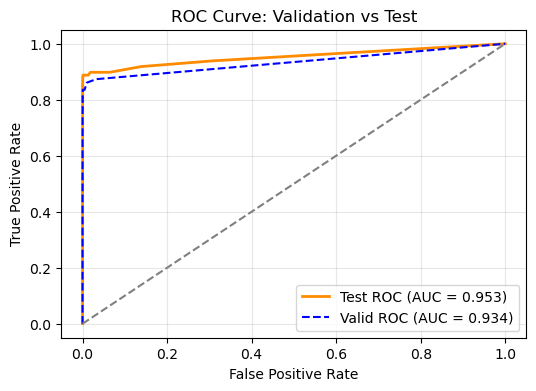

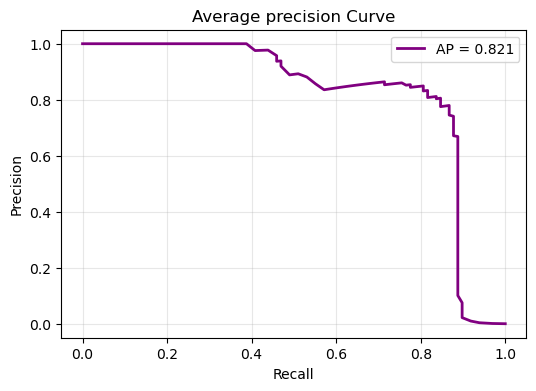

Average Precision (AP): 0.820607


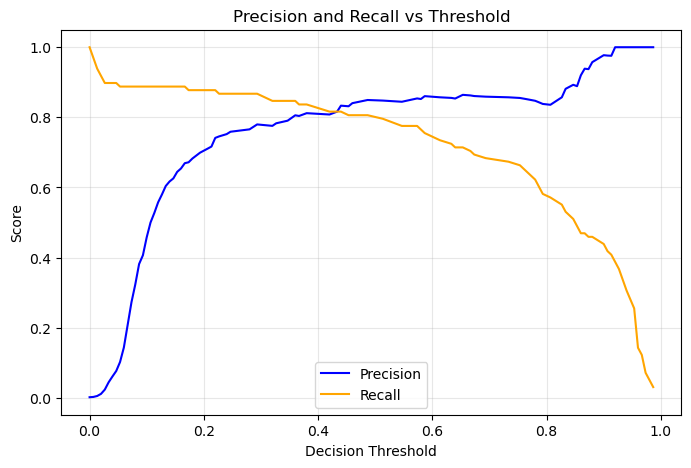

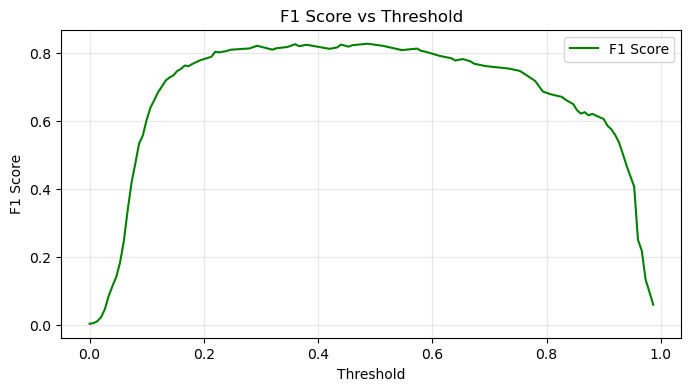

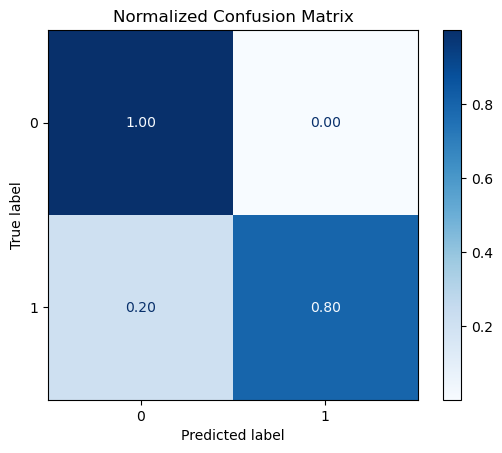

{'Accuracy (Test)': 0.999403,
 'Precision (Test)': 0.847826,
 'Recall (Test)': 0.795918,
 'F1 Score (Test)': 0.821053,
 'F1 Score (Valid)': 0.825175,
 'AUC (Valid)': 0.934183,
 'AUC (Test)': 0.953166,
 'AUC Gap (Valid - Test)': -0.018984}

In [ ]:
#pre pca
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_scaled, y_train)
clf.score(X_valid_scaled, y_valid)

y_pred = clf.predict(X_valid_scaled)
print("=== Random Forest WITHOUT PCA ===")
evaluate_model_proba_analysis(clf, X_valid_scaled, y_valid, X_test, y_test)



=== Random Forest WITH PCA ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999596
Precision (Test): 0.951807
Recall (Test): 0.806122
F1 Score (Test): 0.872928
F1 Score (Valid): 0.814286
AUC (Valid): 0.940329
AUC (Test): 0.956943
AUC Gap (Valid - Test): -0.016614


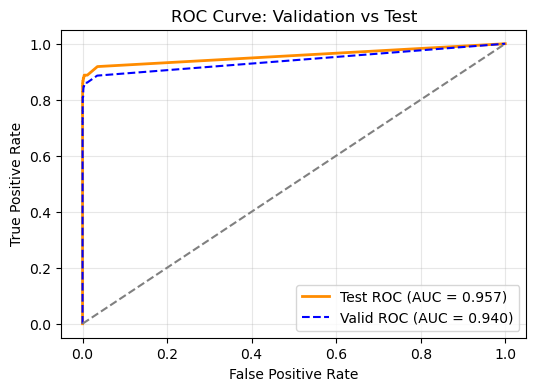

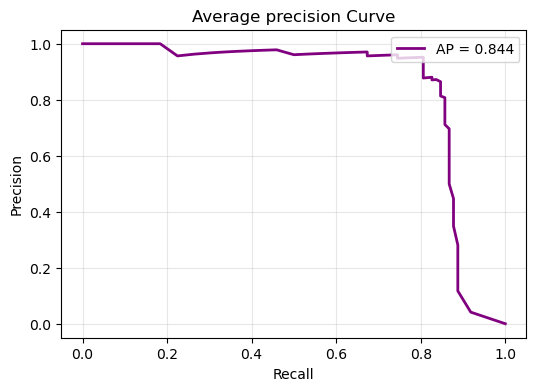

Average Precision (AP): 0.844188


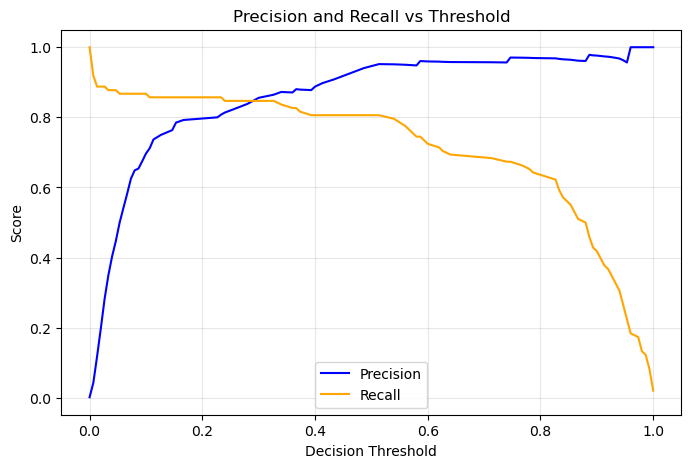

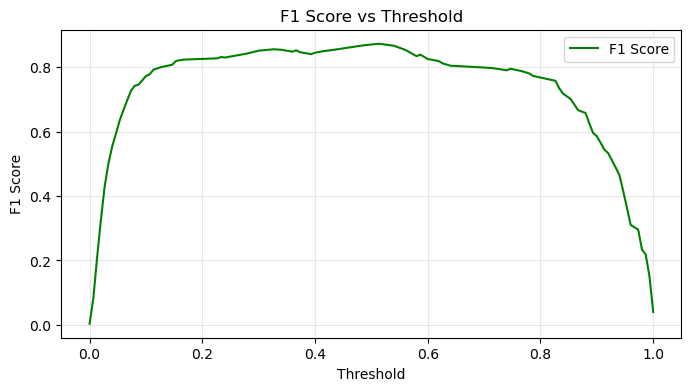

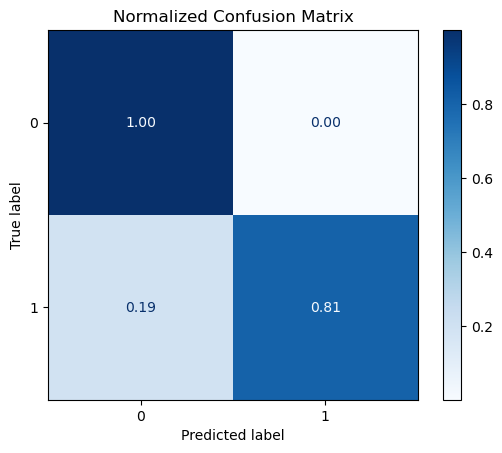

{'Accuracy (Test)': 0.999596,
 'Precision (Test)': 0.951807,
 'Recall (Test)': 0.806122,
 'F1 Score (Test)': 0.872928,
 'F1 Score (Valid)': 0.814286,
 'AUC (Valid)': 0.940329,
 'AUC (Test)': 0.956943,
 'AUC Gap (Valid - Test)': -0.016614}

In [ ]:
#randomforest after pca
clf_pca = RandomForestClassifier(n_estimators=150, random_state=42)
clf_pca.fit(X_train_pca, y_train)

print("\n=== Random Forest WITH PCA ===")
evaluate_model_proba_analysis(clf_pca, X_valid_pca, y_valid, X_test_pca, y_test)

at first glance, pca did help

<div class="alert alert-block alert-info">
random forest finetuning exploration

In [ ]:

rf = RandomForestClassifier(random_state=42, class_weight='balanced') 

param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',  # prioritize F1 due to class imbalance
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Without PCA
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  39.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  41.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  42.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  45.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  49.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  51.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  53.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_

In [ ]:
print("Best params (No PCA):", rf_search.best_params_)  # after fitting on X_train_scaled
print("Best score (No PCA):", rf_search.best_score_)

Best params (No PCA): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Best score (No PCA): 0.8447272675257488


Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999544
Precision (Test): 0.95
Recall (Test): 0.77551
F1 Score (Test): 0.853933
F1 Score (Valid): 0.816901
AUC (Valid): 0.941052
AUC (Test): 0.962818
AUC Gap (Valid - Test): -0.021766


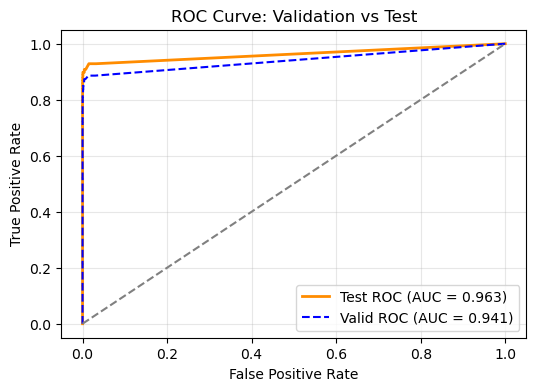

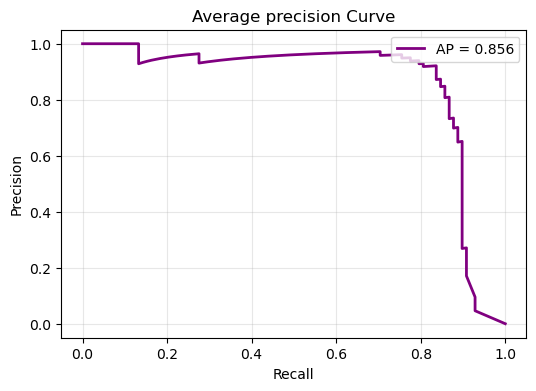

Average Precision (AP): 0.856334


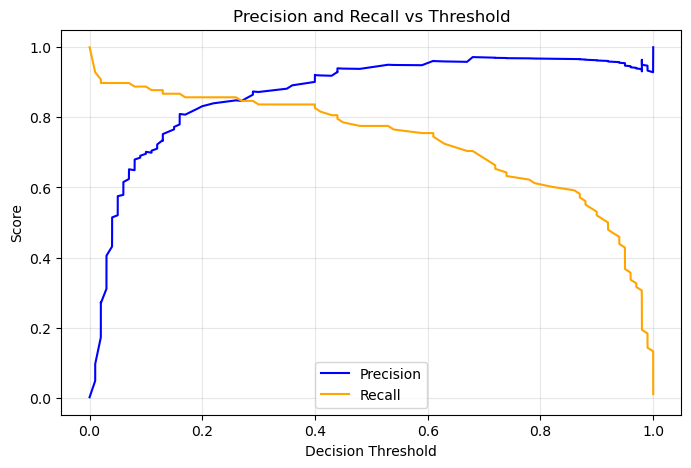

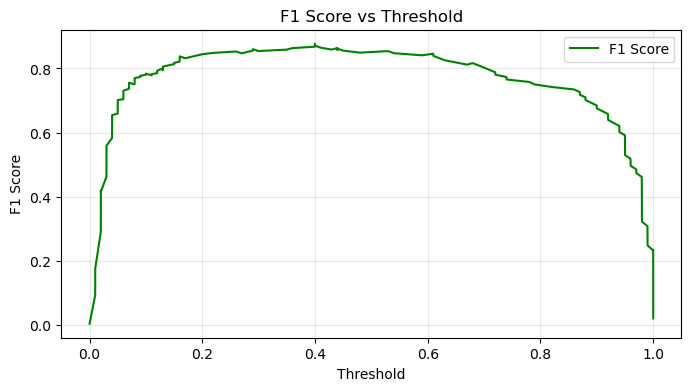

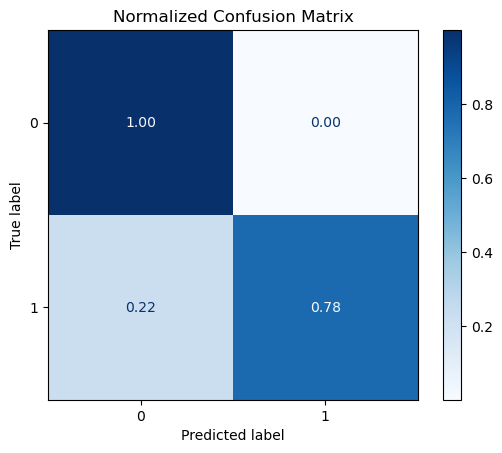

{'Accuracy (Test)': 0.999544,
 'Precision (Test)': 0.95,
 'Recall (Test)': 0.77551,
 'F1 Score (Test)': 0.853933,
 'F1 Score (Valid)': 0.816901,
 'AUC (Valid)': 0.941052,
 'AUC (Test)': 0.962818,
 'AUC Gap (Valid - Test)': -0.021766}

In [ ]:
evaluate_model_proba_analysis(best_rf, X_valid_scaled, y_valid, X_test_scaled, y_test)

<div class="alert alert-block alert-info">
random forest with pca

In [ ]:
param_dist = {
    'n_estimators': randint(100, 201),
    'max_depth': [None, 30, 40],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Stratified CV
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# RandomSearch
random_search_rf_pca = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on PCA-transformed data
random_search_rf_pca.fit(X_train_pca, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=102; total time= 1.1min
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=102; total time= 1.1min
[CV] END class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=102; total time= 1.1min
[CV] END class_weight=balanced, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=174; total time= 1.7min
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=160; total time= 1.8min
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=160; total time= 1.9min
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2,
            train_size=None),
                   estimator=RandomForestClassifier(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f71f4280710>},
                   random_state=42, scoring='f1', verbose=2)

In [57]:
# With PCA
print("Best params (PCA + RF):", random_search_rf_pca.best_params_)
print("Best F1 score (PCA + RF):", random_search_rf_pca.best_score_)

Best params (PCA + RF): {'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 126}
Best F1 score (PCA + RF): 0.8290598290598291


Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999407
Precision (Test): 0.919355
Recall (Test): 0.721519
F1 Score (Test): 0.808511
F1 Score (Valid): 0.839779
AUC (Valid): 0.950968
AUC (Test): 0.93315
AUC Gap (Valid - Test): 0.017819


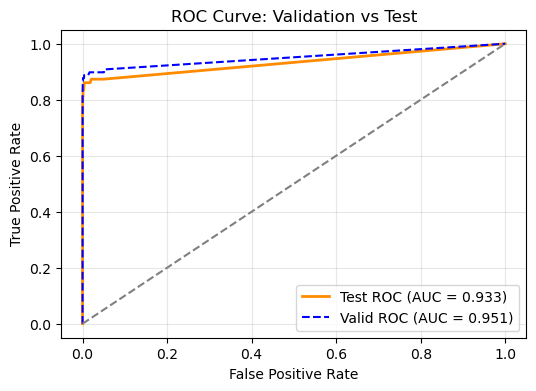

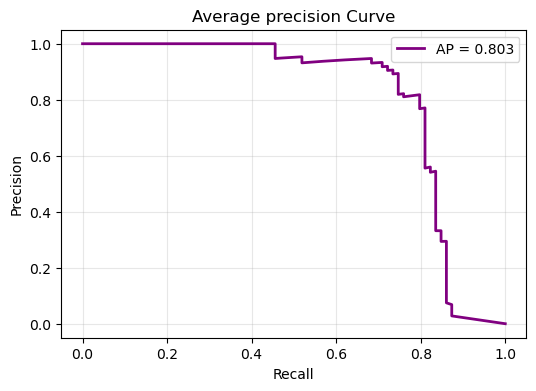

Average Precision (AP): 0.802967


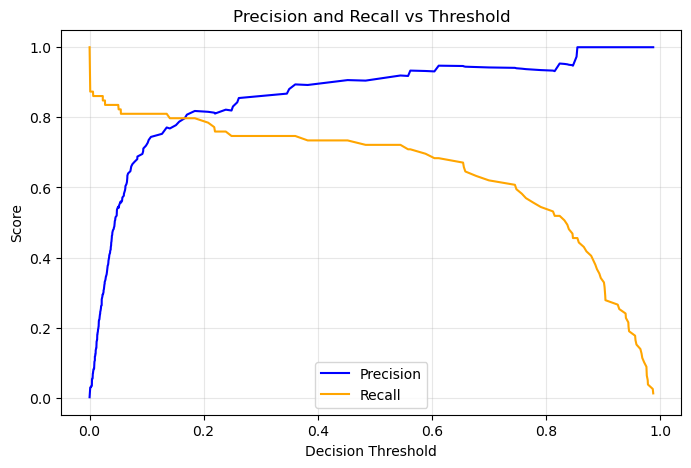

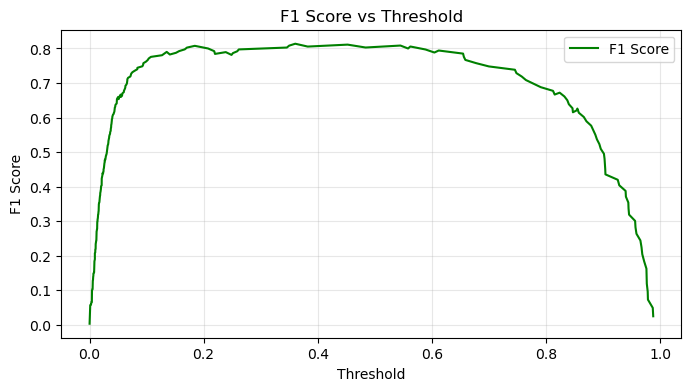

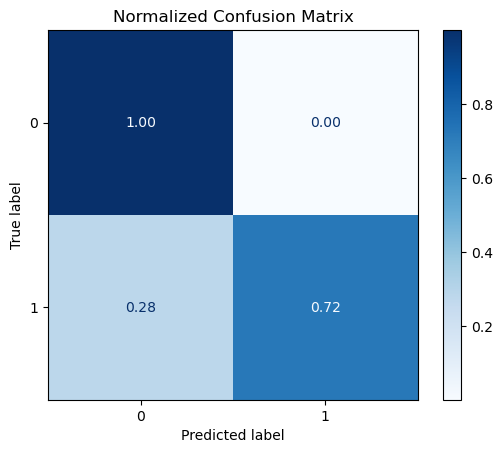

In [60]:
# Best model pipeline
best_model_rf_pca = random_search_rf_pca.best_estimator_

# Evaluate on validation and test
results = evaluate_model_proba_analysis(best_model_rf_pca, X_test_pca, y_test, X_valid_pca, y_valid)

In [19]:

# Include default values explicitly


param_grid = {
    'n_estimators': [100, 126, 150],     
    'max_depth': [None, 40],             
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1],             
    'class_weight': [None, 'balanced']   
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 2/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.798 total time= 1.5min
[CV 3/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.811 total time= 1.5min
[CV 3/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.815 total time= 1.5min
[CV 1/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.863 total time= 1.6min
[CV 2/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.804 total time= 1.7min
[CV 1/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.859 total time= 1.7min
[CV 2/3] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=126

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 40], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 126, 150]},
             scoring='f1', verbose=3)

In [23]:

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_rf_grid = grid_search.best_estimator_

Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 126}



=== Random Forest WITH PCA (After GridSearchCV, Small Grid) ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999544
Precision (Test): 0.918605
Recall (Test): 0.806122
F1 Score (Test): 0.858696
F1 Score (Valid): 0.805755
AUC (Valid): 0.940088
AUC (Test): 0.951995
AUC Gap (Valid - Test): -0.011907


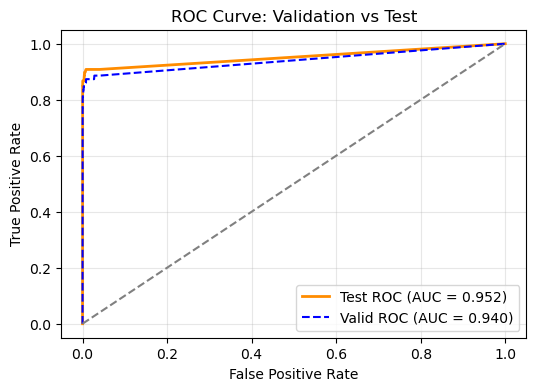

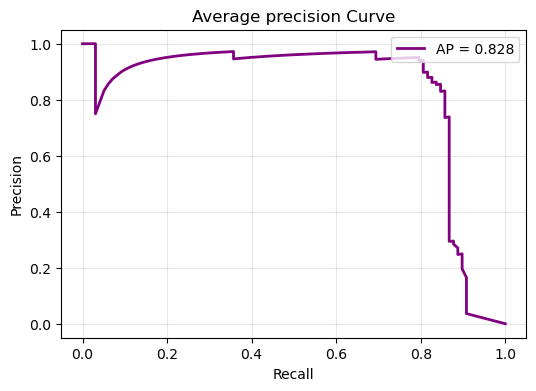

Average Precision (AP): 0.828414


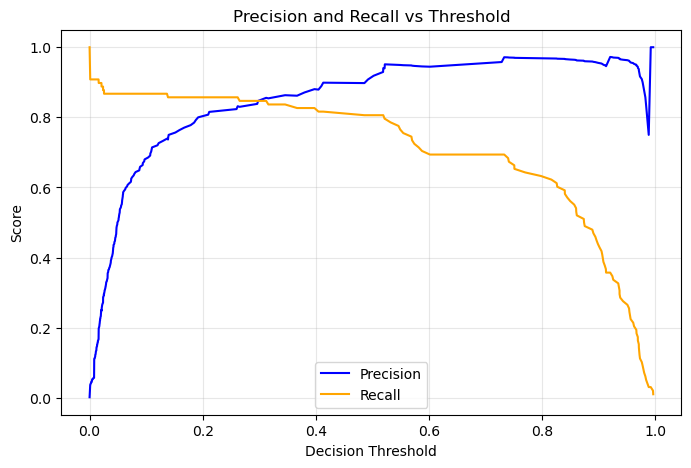

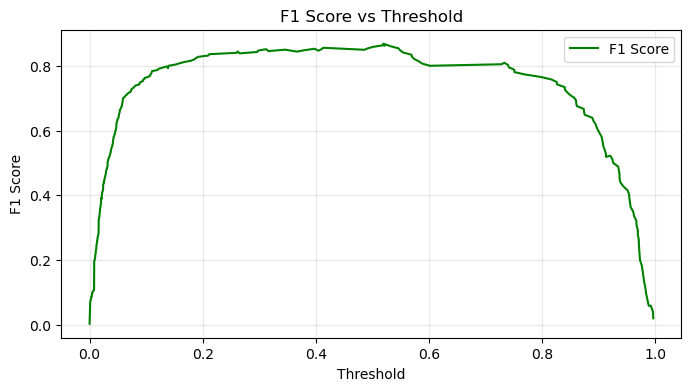

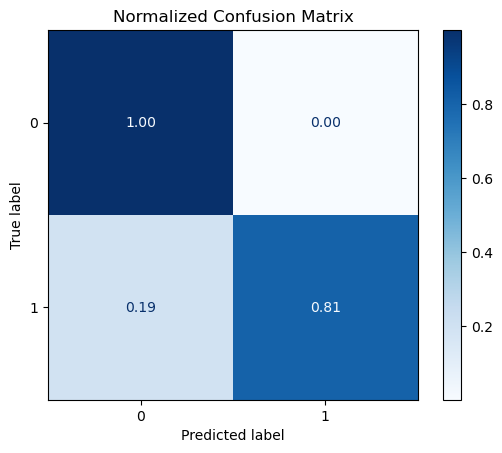

{'Accuracy (Test)': 0.999544,
 'Precision (Test)': 0.918605,
 'Recall (Test)': 0.806122,
 'F1 Score (Test)': 0.858696,
 'F1 Score (Valid)': 0.805755,
 'AUC (Valid)': 0.940088,
 'AUC (Test)': 0.951995,
 'AUC Gap (Valid - Test)': -0.011907}

In [24]:
print("\n=== Random Forest WITH PCA (After GridSearchCV, Small Grid) ===")
evaluate_model_proba_analysis(best_rf_grid, X_valid_pca, y_valid, X_test_pca, y_test)

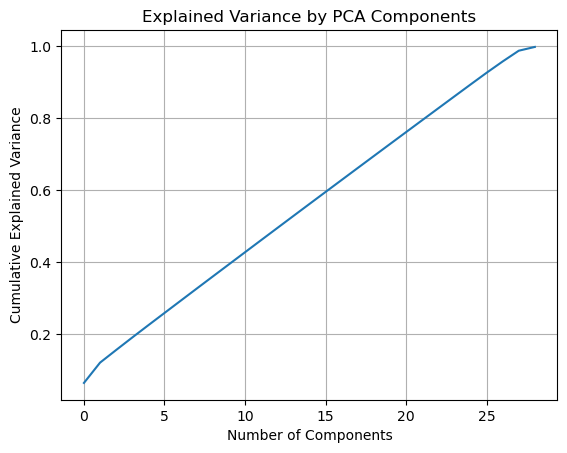

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

pca helped in generalisation, overfitting was reduced

In [ ]:

f1_scores = []
component_range = range(5, 31)

for n in component_range:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('clf', RandomForestClassifier(
            n_estimators=200,
            min_samples_split=2,
            min_samples_leaf=2,
            max_features='sqrt',
            max_depth=50,
            random_state=42,
            class_weight='balanced'  
        ))
    ])

    pipe.fit(X_train, y_train)
    y_valid_proba = pipe.predict_proba(X_valid)[:, 1]

    y_valid_pred = (y_valid_proba >= 0.5).astype(int)

    f1 = f1_score(y_valid, y_valid_pred)
    f1_scores.append(f1)

# Identify best n_components
best_n = component_range[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"\n Best PCA components: {best_n}  Validation F1 Score: {best_f1:.4f}")



 Best PCA components: 28  Validation F1 Score: 0.7832


f1 score dropped here 

In [ ]:

# Step 1: Fit PCA on training data
pca = PCA(n_components=28, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Step 2: Set up RF and parameter search
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Step 3: Fit RF on PCA-transformed data
rf_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  48.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  50.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  52.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  55.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.0min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.1min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.2min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:

best_rf_pca28 = rf_search.best_estimator_

print(" Best RF Params (PCA=28):", rf_search.best_params_)
print(" Best CV F1 Score (PCA=28):", rf_search.best_score_)



 Best RF Params (PCA=28): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
 Best CV F1 Score (PCA=28): 0.8201171435007883


Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.99932
Precision (Test): 0.875
Recall (Test): 0.708861
F1 Score (Test): 0.783217
F1 Score (Valid): 0.808743
AUC (Valid): 0.965433
AUC (Test): 0.945163
AUC Gap (Valid - Test): 0.02027


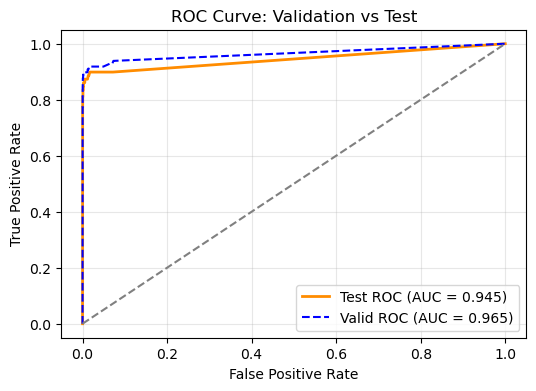

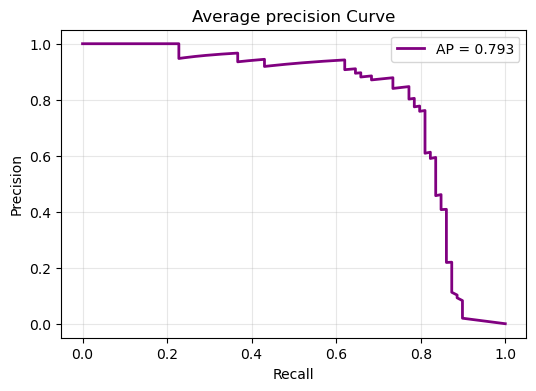

Average Precision (AP): 0.792660


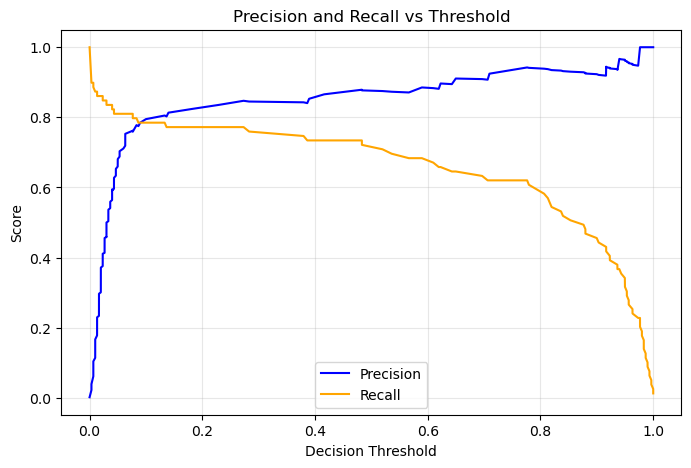

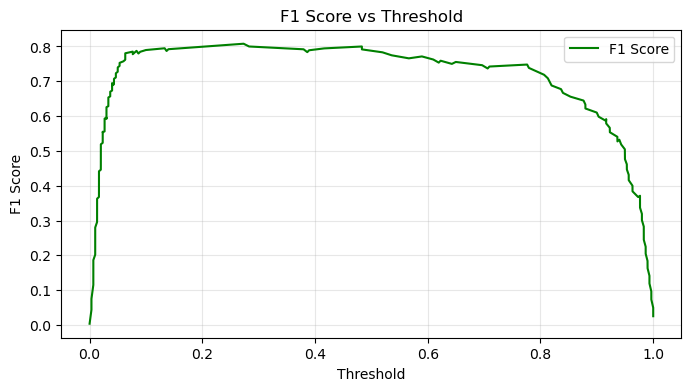

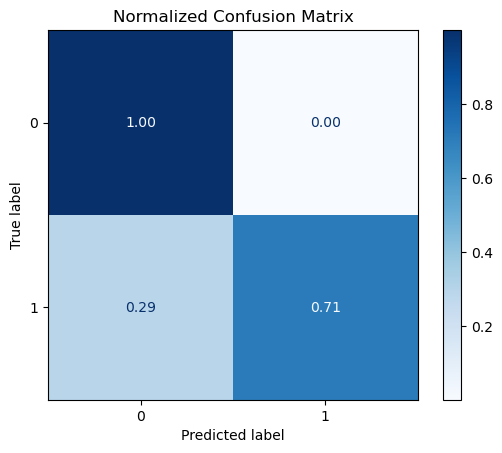

{'Accuracy (Test)': 0.99932,
 'Precision (Test)': 0.875,
 'Recall (Test)': 0.708861,
 'F1 Score (Test)': 0.783217,
 'F1 Score (Valid)': 0.808743,
 'AUC (Valid)': 0.965433,
 'AUC (Test)': 0.945163,
 'AUC Gap (Valid - Test)': 0.02027}

In [ ]:
evaluate_model_proba_analysis(best_rf_pca28, X_test_pca, y_test, X_valid_pca, y_valid)

f1 test recall test auc gap is better on 29 componentsm picking 29

In [19]:
#number of components is still picked at 29 due to better auc gap
pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)



Best threshold by max F1 (on validation): 0.3854
Best F1 Score (validation): 0.8138

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999544
Precision (Test): 0.918605
Recall (Test): 0.806122
F1 Score (Test): 0.858696
F1 Score (Valid): 0.805755
AUC (Valid): 0.940088
AUC (Test): 0.951995
AUC Gap (Valid - Test): -0.011907


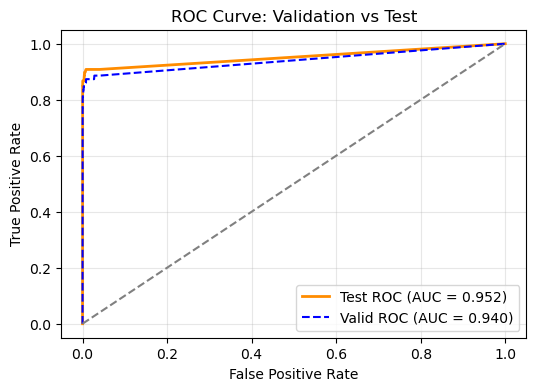


Evaluation at Best Threshold:
-------- Validation Set --------
Accuracy:  0.999407
Precision: 0.893939
Recall:    0.746835
F1 Score:  0.813793
AUC:       0.940088
---------- Test Set ----------
Accuracy:  0.999508
Precision: 0.880435
Recall:    0.826531
F1 Score:  0.852632
AUC:       0.951995

AUC Gap (Valid - Test): -0.011907


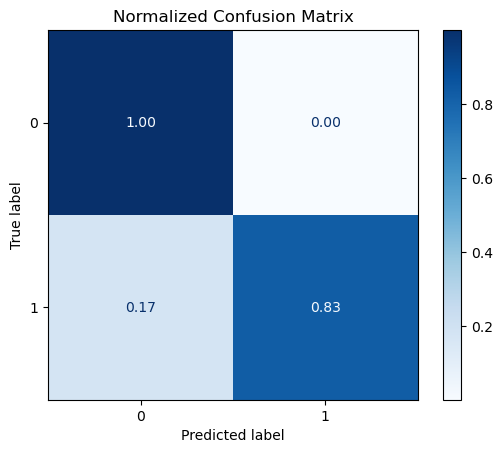

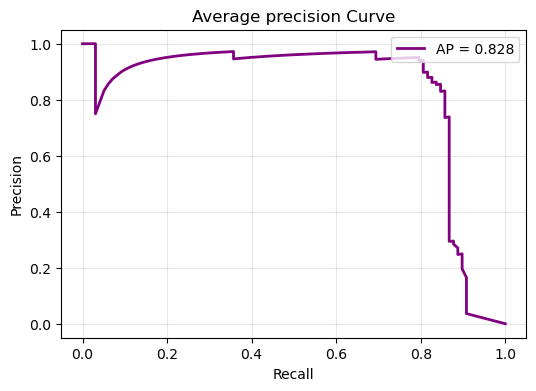

Average Precision (AP): 0.828414


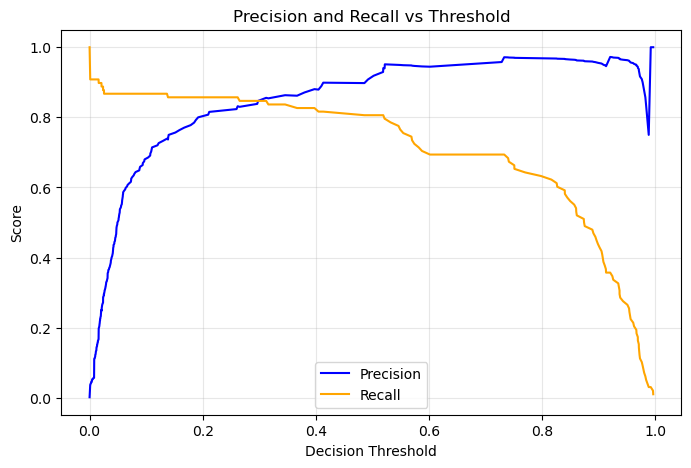

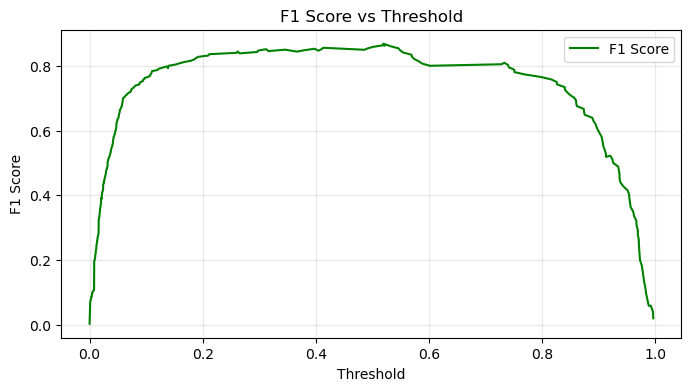

In [26]:
# Use the best parameters from GridSearchCV
rf_best_from_grid = RandomForestClassifier(
    class_weight=None,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=126,
    random_state=42
)

# Fit the model on training PCA-transformed data
rf_best_from_grid.fit(X_train_pca, y_train)

# Evaluate with your full evaluation pipeline (includes threshold optimization)
results = evaluate_with_best_threshold(
    rf_best_from_grid,
    X_test_pca, y_test,
    X_valid_pca, y_valid
)

In [20]:

rf_model_pca = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

rf_model_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)


Best threshold by max F1 (on validation): 0.4667
Best F1 Score (validation): 0.8169

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999561
Precision (Test): 0.939759
Recall (Test): 0.795918
F1 Score (Test): 0.861878
F1 Score (Valid): 0.8
AUC (Valid): 0.94691
AUC (Test): 0.946934
AUC Gap (Valid - Test): -2.4e-05


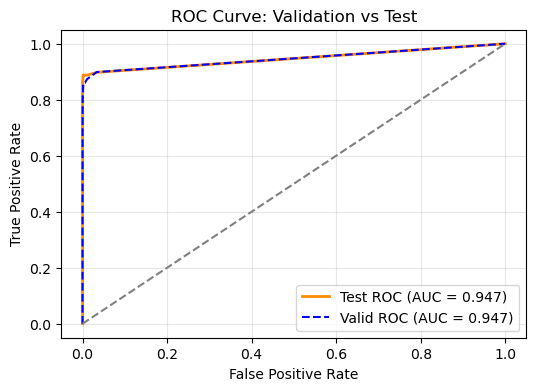


Evaluation at Best Threshold:
-------- Validation Set --------
Accuracy:  0.999429
Precision: 0.920635
Recall:    0.734177
F1 Score:  0.816901
AUC:       0.946910
---------- Test Set ----------
Accuracy:  0.999561
Precision: 0.929412
Recall:    0.806122
F1 Score:  0.863388
AUC:       0.946934

AUC Gap (Valid - Test): -0.000024


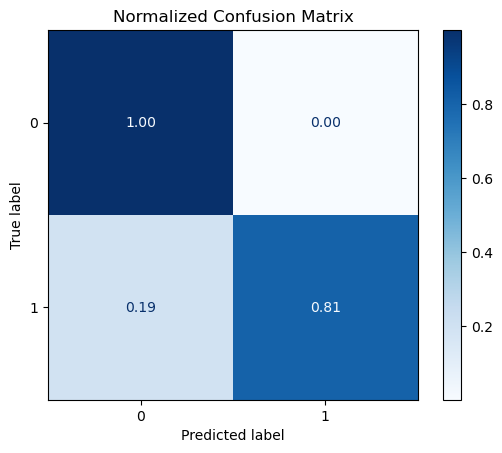

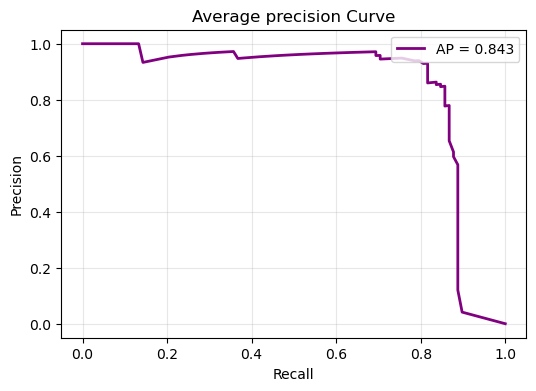

Average Precision (AP): 0.843388


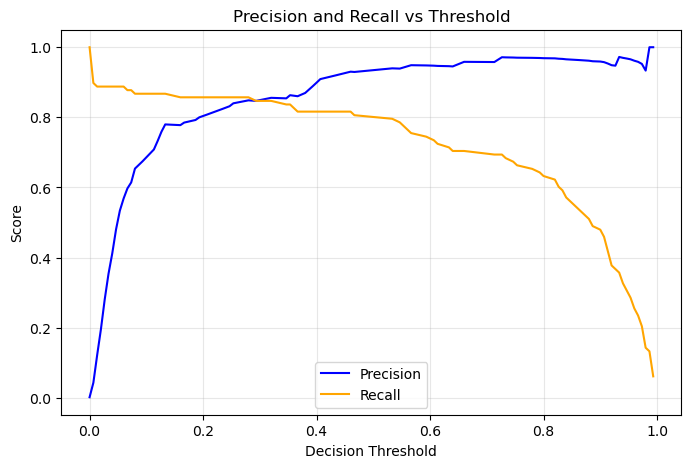

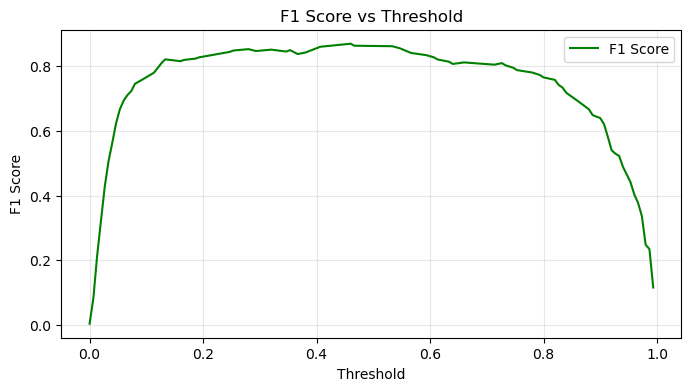

In [ ]:

results = evaluate_with_best_threshold(rf_model_pca, X_test_pca, y_test, X_valid_pca, y_valid)

In [ ]:
#sticking with the following params for randomforest due to better F1 and AUC gap (AUC gap indiates better generalisation)
#rf_model_pca = RandomForestClassifier(
#    n_estimators=150,
#    random_state=42
#)


In [23]:
import joblib

# Save both PCA and the trained model
joblib.dump({
    'pca': pca,
    'model': rf_model_pca
}, 'rf_pca_no smote.joblib')

['rf_pca_no smote.joblib']

threshold tuning:

    AUC gap is nearly zero (good generalisation)

    higher recall and f1 test

    
0.843 average precision which is area under the precision recall curve, aggregates both precision and recall over all thresholds and focuses on positive class

<div class="alert alert-block alert-info">
isolation forest route

In [24]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.00172, random_state=42)
outlier_labels = iso.fit_predict(X_train_pca)

# Convert to binary feature (1 = outlier, 0 = normal)
outlier_feature = (outlier_labels == -1).astype(int)

# Add to DataFrame
X_train_with_outlier = X_train_pca.copy()
X_train_with_outlier = np.hstack([X_train_with_outlier, outlier_feature.reshape(-1, 1)])

In [25]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30, 
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train_with_outlier, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.1min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.1min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=157; total time= 1.1min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.2min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.4min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.4min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.5min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [30, 40, 50, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1d36714890>},
                   random_state=42, scoring='f1', verbose=2)

In [27]:
print("Best Parameters:", rf_search.best_params_)
print("Best CV F1 Score:", rf_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157}
Best CV F1 Score: 0.8191443024100661


In [28]:
best_rf_model = rf_search.best_estimator_

valid_outlier_flag = (iso.predict(X_valid_pca) == -1).astype(int)
test_outlier_flag = (iso.predict(X_test_pca) == -1).astype(int)

X_valid_with_outlier = np.hstack([X_valid_pca, valid_outlier_flag.reshape(-1, 1)])
X_test_with_outlier = np.hstack([X_test_pca, test_outlier_flag.reshape(-1, 1)])

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999456
Precision (Test): 0.946667
Recall (Test): 0.72449
F1 Score (Test): 0.820809
F1 Score (Valid): 0.768116
AUC (Valid): 0.940127
AUC (Test): 0.962367
AUC Gap (Valid - Test): -0.02224


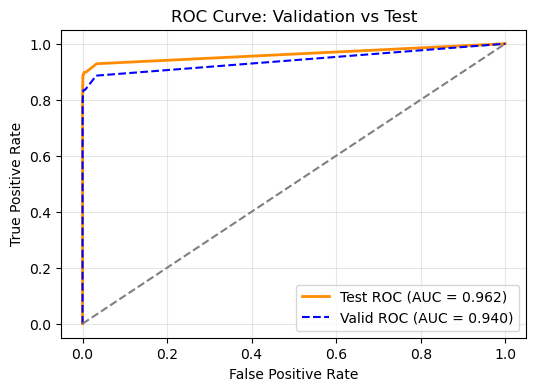

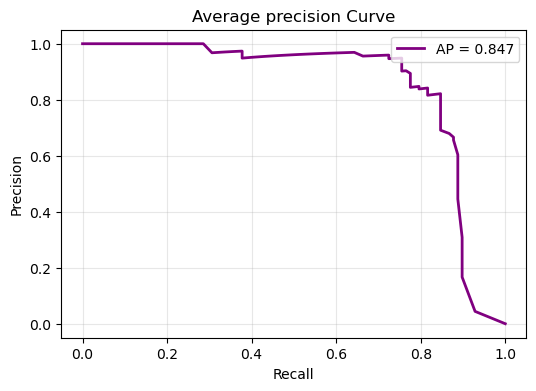

Average Precision (AP): 0.846632


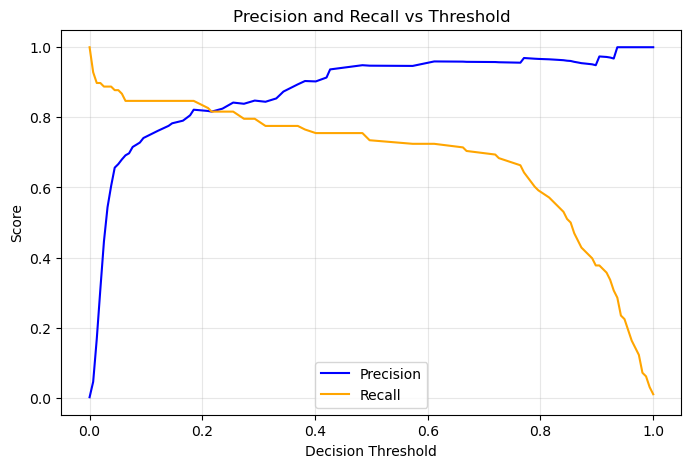

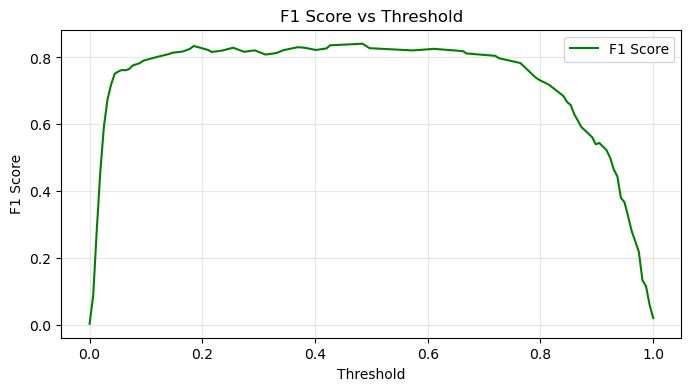

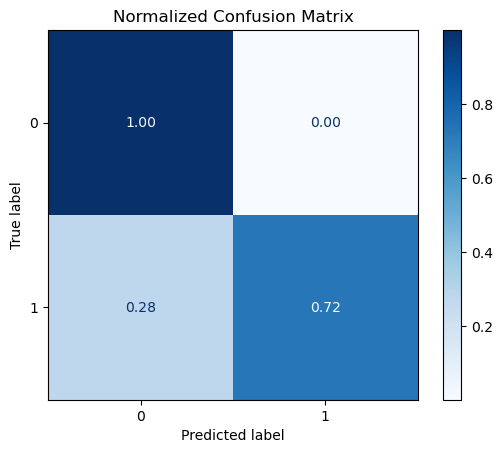

In [29]:
metrics = evaluate_model_proba_analysis(
    best_rf_model, 
    X_valid_with_outlier, y_valid, 
    X_test_with_outlier, y_test
)


isolation forest feature decreased f1 test and recall, withauc gap increased, sticking with pca then random forest 

<div class="alert alert-block alert-info">
observations between without smote resample vs smote resample 

without smote resample approach:

random forest after pca is the top performer here

Semi-supervised approach was attempted with pca, then isolation forest to add outlier feature then random forest

Howver, this did not outperform the pca random forest approach

Key metrics used when comparing models here are: F1 test, recall, AUC gap


In conclusion, 
without smote randomforest after pca (f1 0.86) is the top performer here even as compared to smote approaches.